**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

MATRICULA / NOMBRE

*  A00466615 Manuel Alejandro de Luis López
*  A01796049 Edgar Mendoza Martínez
*  A01796032 Francisco Javier Salgado Acevedo
*  A01795975 Diego Andrés Bernal Díaz

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Tec_Monterrey/Ciencia_analitica_datos/Entregables/Semana_9"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [5]:
data_df.set_index('id', inplace=True)

In [6]:
data_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820




1a) Estadísticas descriptivas para todas las variables del dataframe.

In [7]:
data_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [8]:
data_df.nunique()


diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

1c) Búsqueda de valores faltantes.

In [9]:
data_df.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

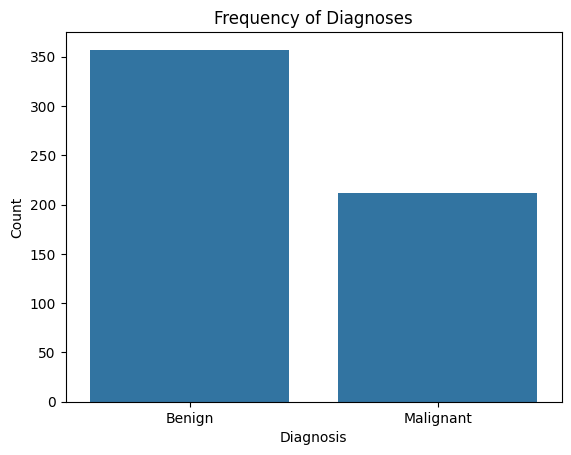

In [10]:

benign_count = data_df['diagnosis'].value_counts()['B']
malignant_count = data_df['diagnosis'].value_counts()['M']

sns.barplot(x=['Benign', 'Malignant'], y=[benign_count, malignant_count])

plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Frequency of Diagnoses")
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

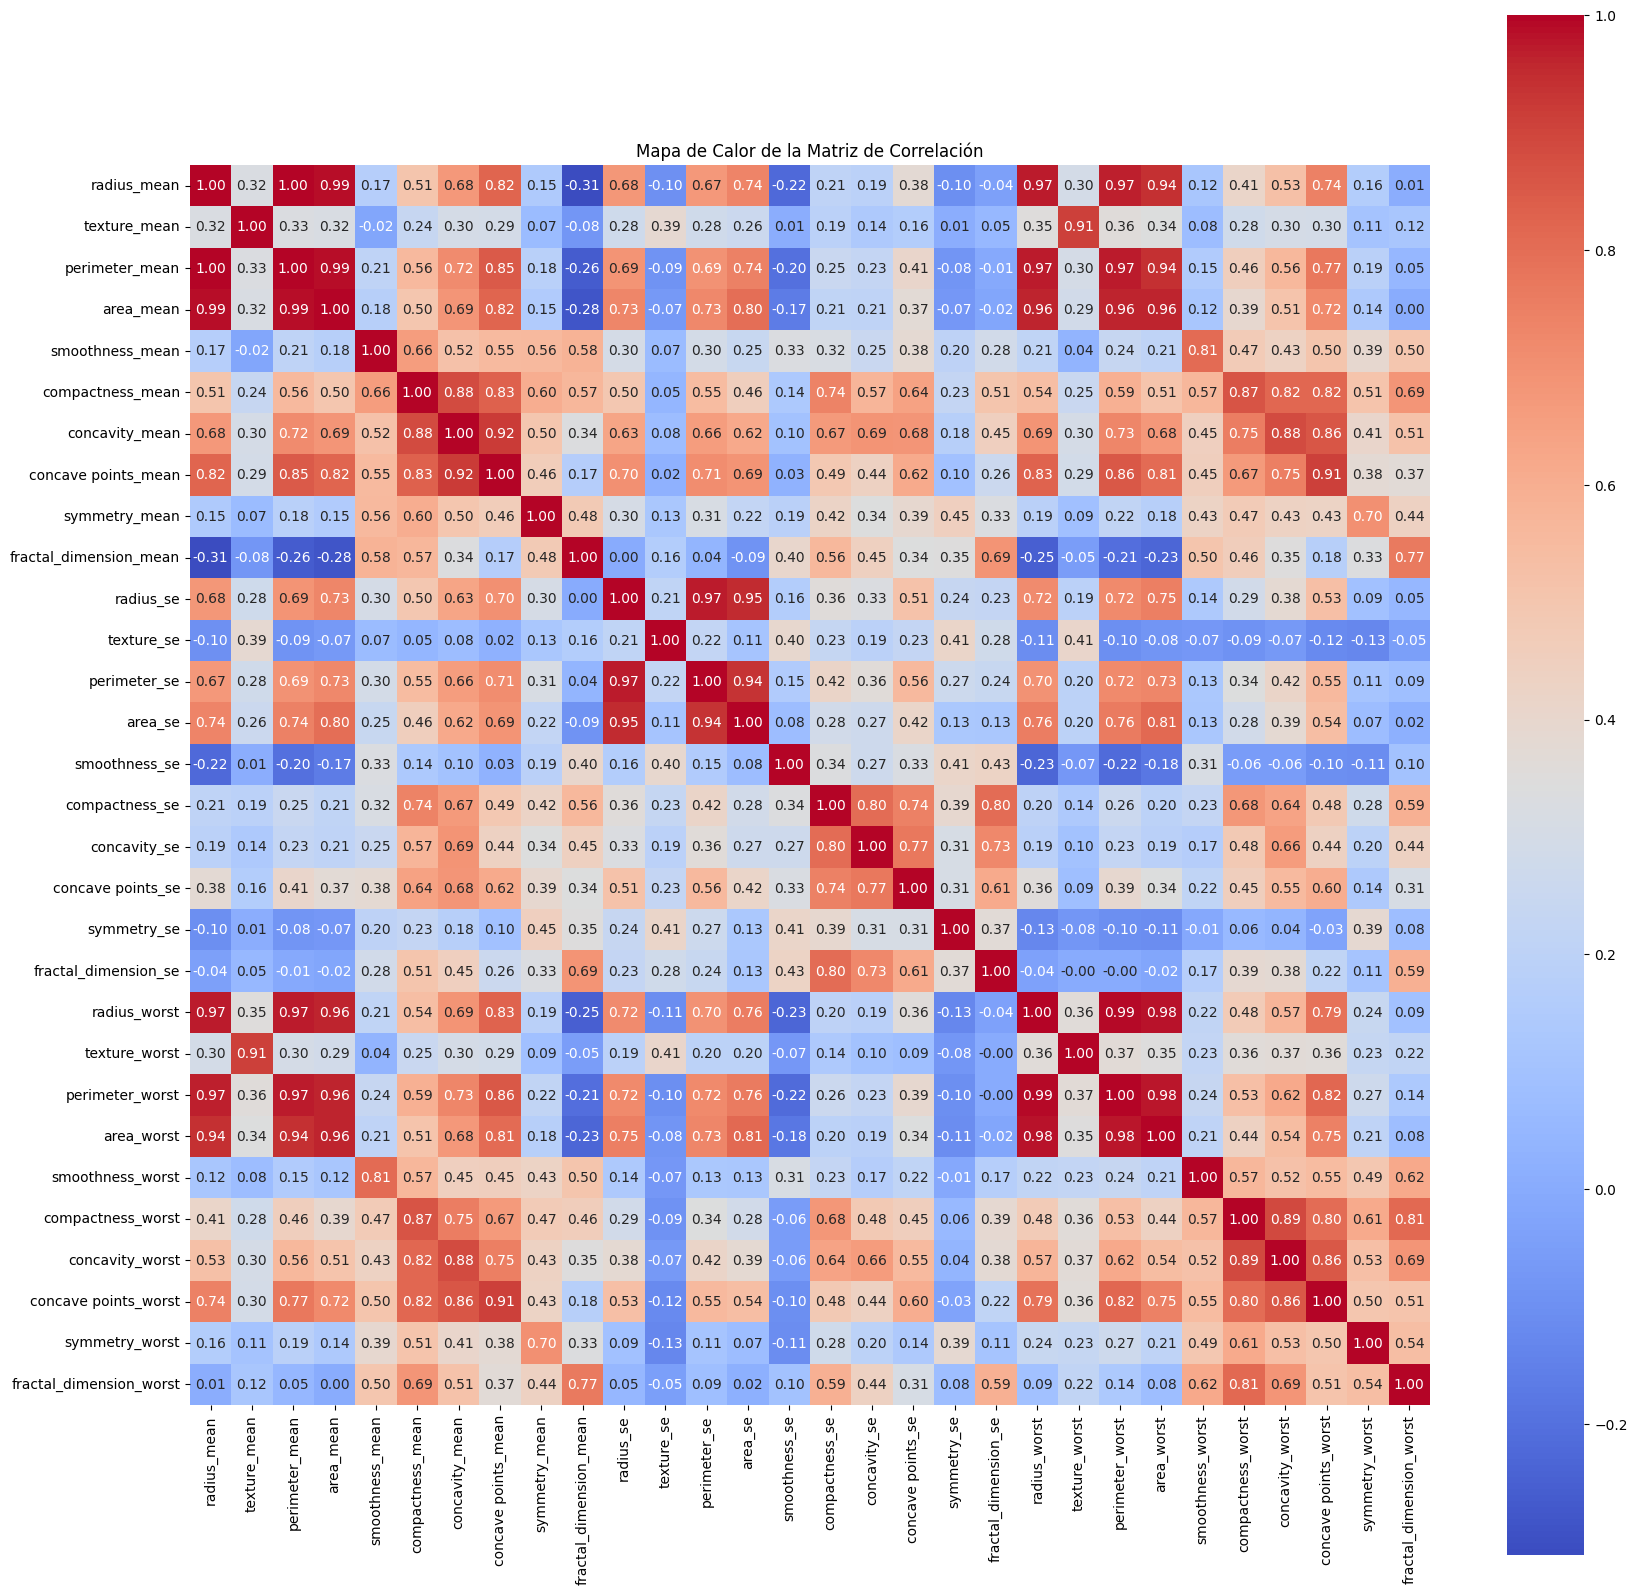

In [11]:
correlation_matrix = data_df.drop(columns=['diagnosis']).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

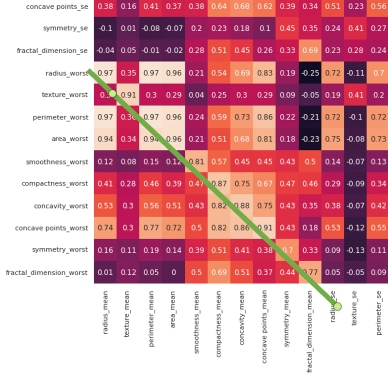

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [12]:
data_df_reduced = data_df.drop(columns=[col for col in data_df.columns if 'worst' in col])
data_df_reduced

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




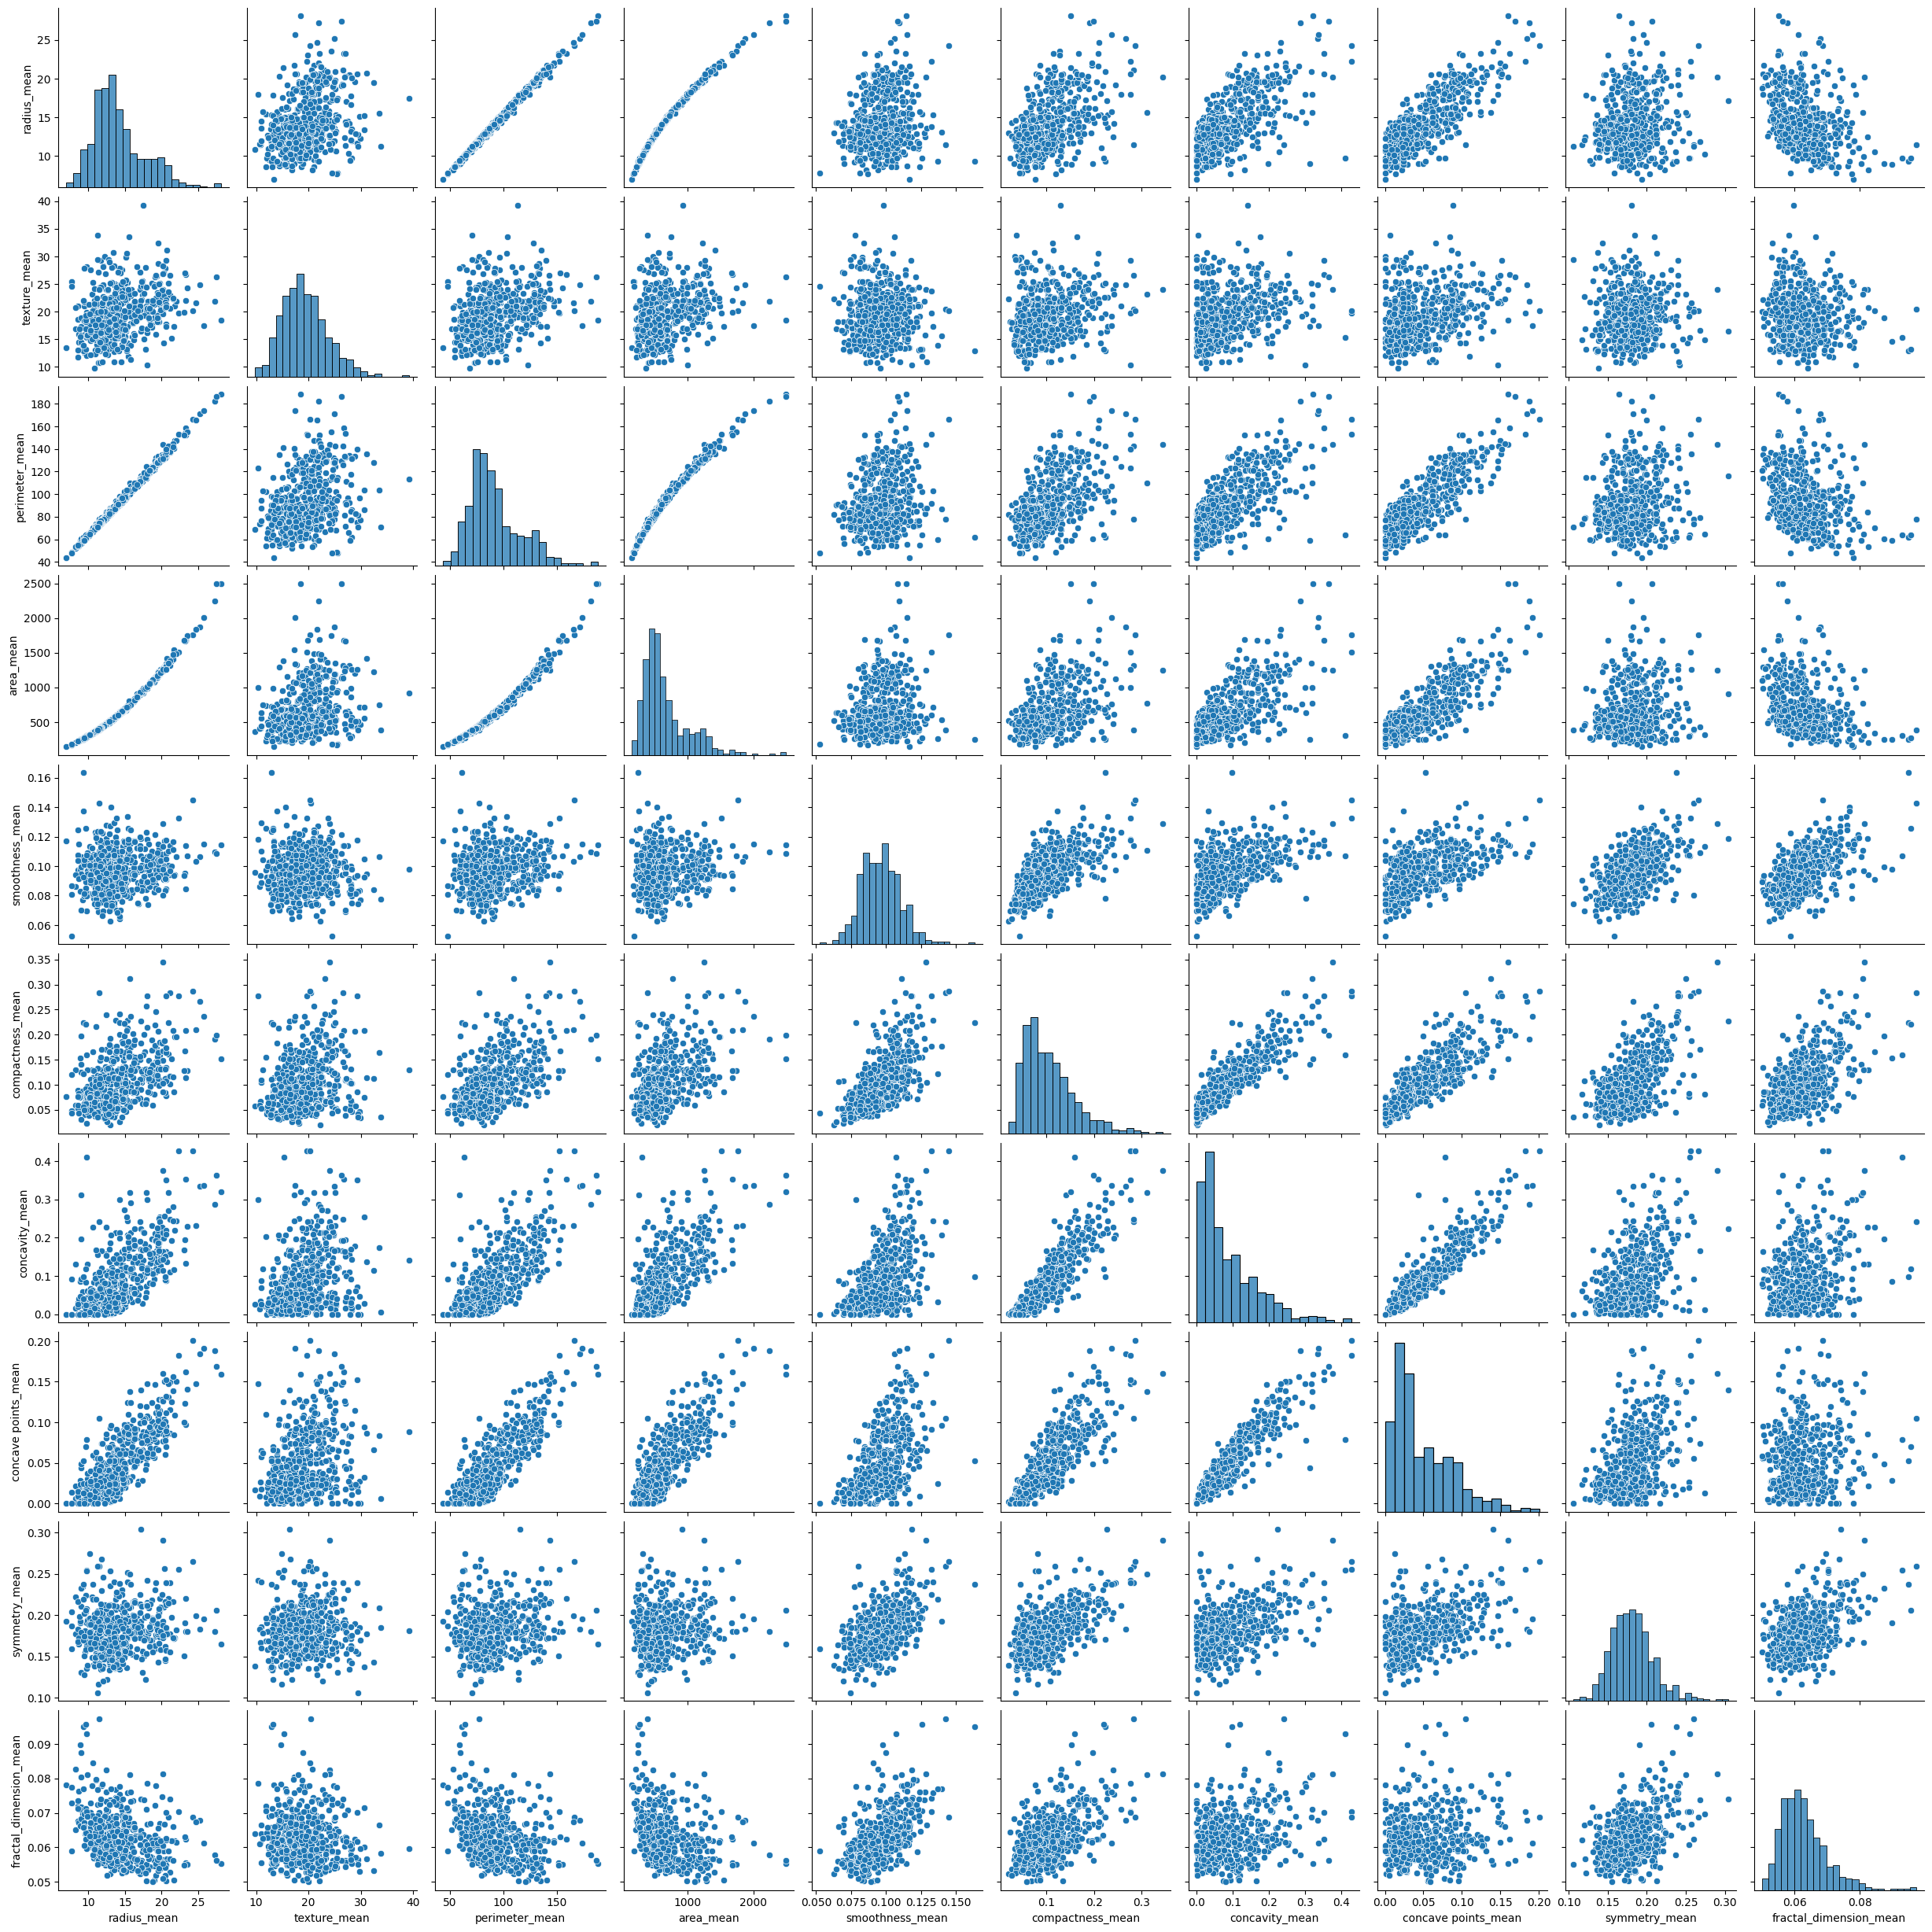

In [13]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


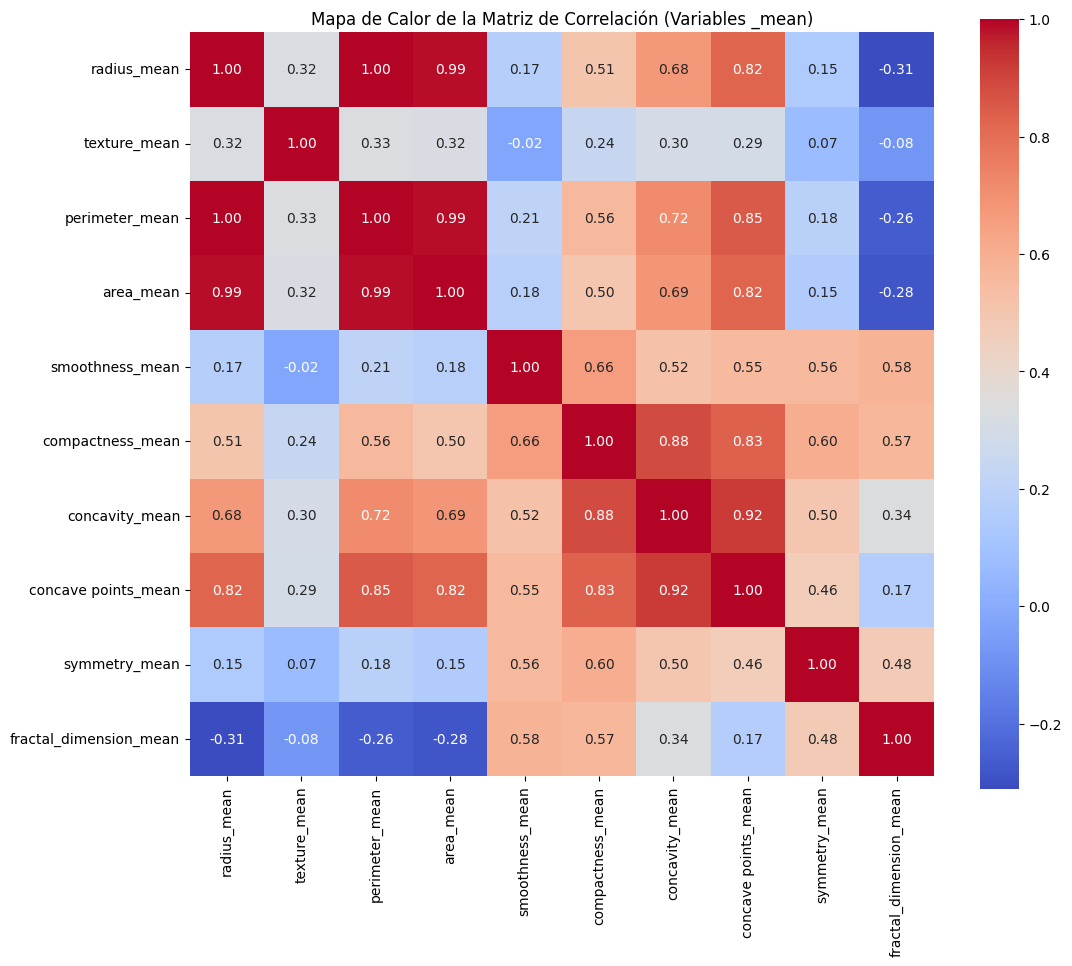

In [14]:
mean_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

data_df_mean = data_df[mean_columns]
correlation_matrix_mean = data_df_mean.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_mean, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Mapa de Calor de la Matriz de Correlación (Variables _mean)')
plt.show()


3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [15]:
variables_a_mantener = ['radius_mean', 'texture_mean', 'smoothness_mean',
                        'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
                        'radius_se', 'texture_se', 'smoothness_se',
                        'compactness_se', 'symmetry_se', 'fractal_dimension_se']

data_df_reduced_final = data_df[variables_a_mantener]

data_df_reduced_final


,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,
842302,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
926682,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
926954,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

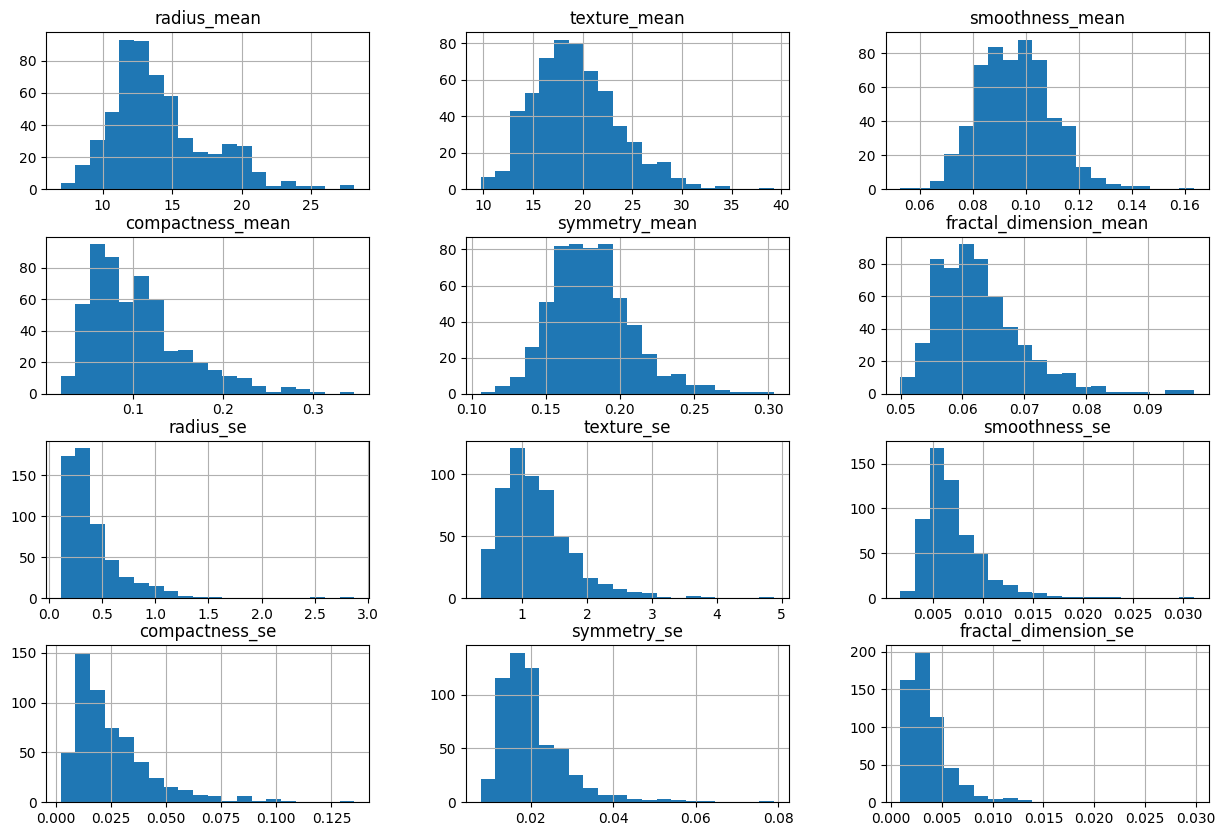

Variables con sesgo positivo marcado (skew > 1): ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


In [16]:
data_df_reduced_final.hist(bins=20, figsize= (15,10))
plt.show()

skew_values = data_df_reduced_final.skew()
skew_cols = skew_values[skew_values > 1].index.tolist()
print(f"Variables con sesgo positivo marcado (skew > 1): {skew_cols}")

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


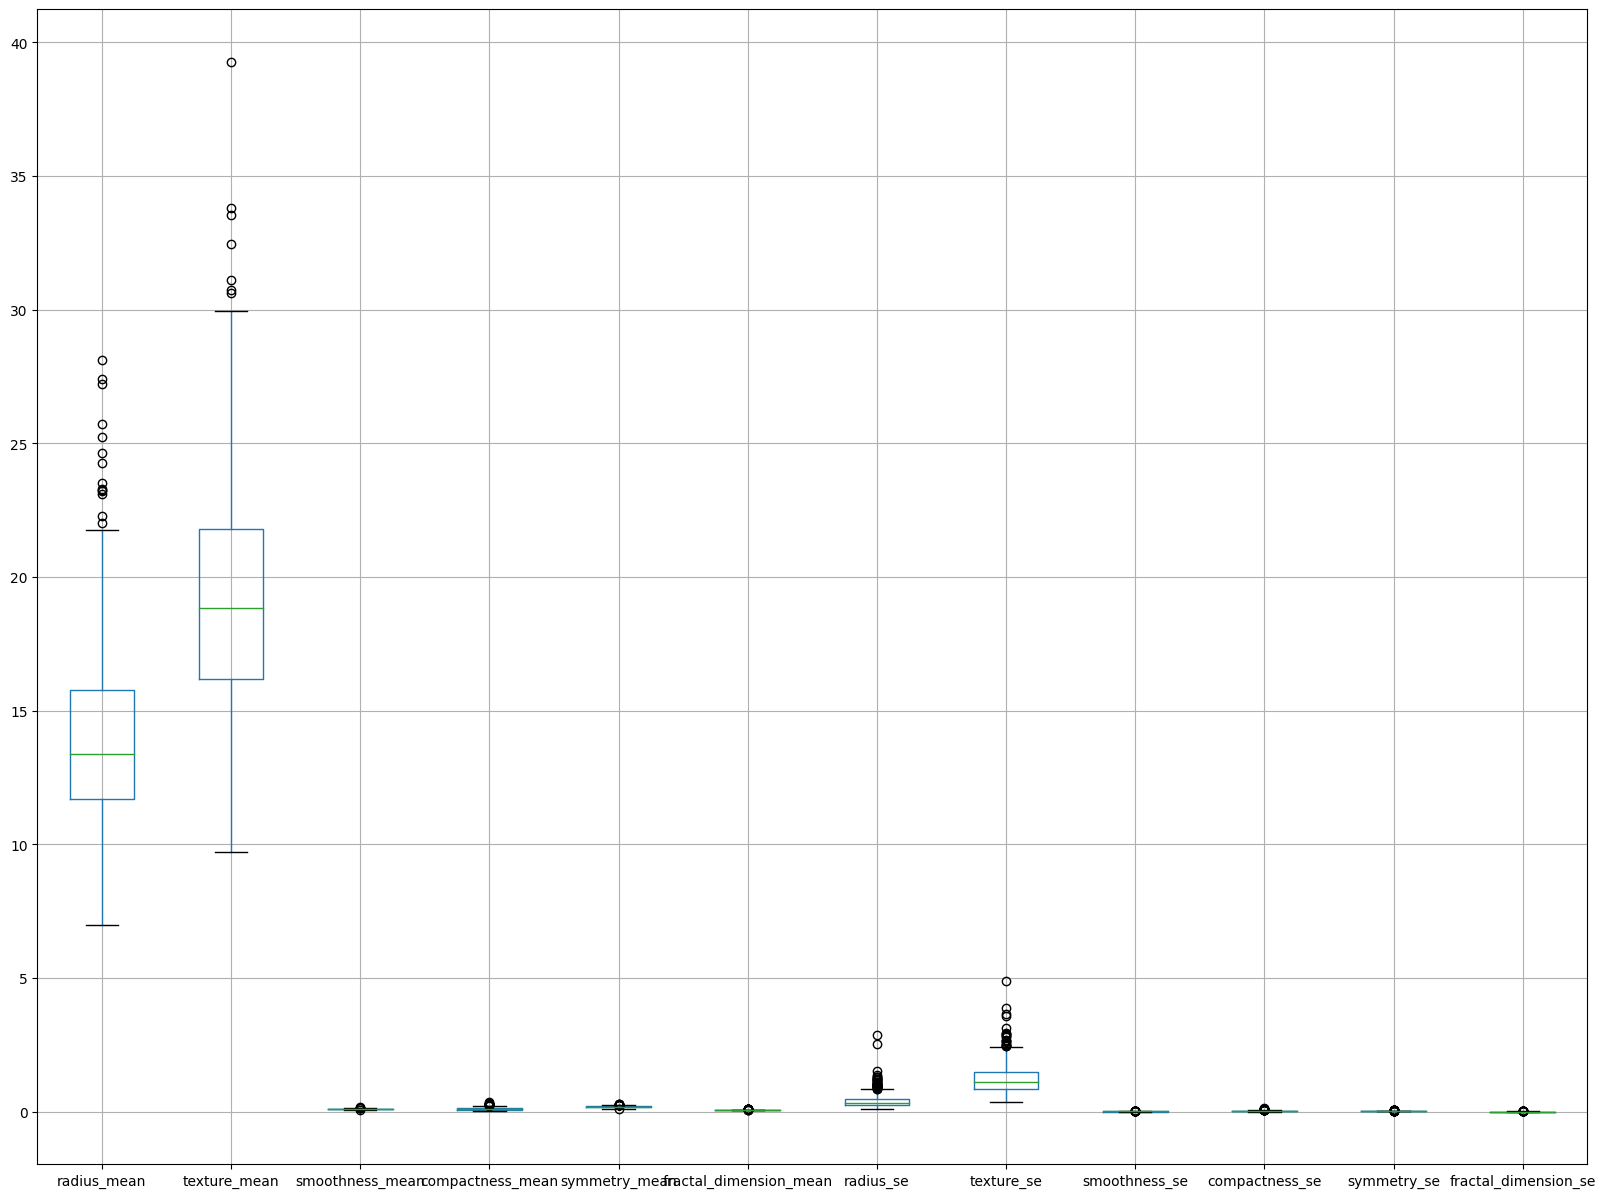

Variables fuera del intervalo [0,1]: ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


In [17]:
plt.figure(figsize=(20, 15))
data_df_reduced_final.boxplot()
plt.show()

scale_cols = data_df_reduced_final.columns[
    (data_df_reduced_final.max() > 1) |
    (data_df_reduced_final.min() < 0)
].tolist()

print(f"Variables fuera del intervalo [0,1]: {scale_cols}")

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Volver a leer el archivo y establecer 'id' como índice
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

# Seleccionar las variables predictoras y la variable de respuesta
X = data_df.drop(columns=['diagnosis'])
y = data_df['diagnosis']

# Dividir el conjunto en entrenamiento y prueba (80:20) con random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Verificar las dimensiones de los conjuntos de datos
print(f"Dimensiones del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")


Dimensiones del conjunto de entrenamiento: X_train: (455, 30), y_train: (455,)
Dimensiones del conjunto de prueba: X_test: (114, 30), y_test: (114,)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [19]:
from sklearn.compose import ColumnTransformer

# Definir las columnas a eliminar
columns_to_drop = ['radius_worst',
'texture_worst',
'perimeter_worst',
'area_worst',
'smoothness_worst',
'compactness_worst',
'concavity_worst',
'concave points_worst',
'symmetry_worst',
'fractal_dimension_worst',
'perimeter_mean',
'area_mean',
'concavity_mean',
'concave points_mean',
'perimeter_se',
'area_se',
'concavity_se',
'concave points_se']

# Crear el transformador
preprocessing = ColumnTransformer(transformers=[('drop_cols', 'drop', columns_to_drop)],remainder='passthrough')

# Verificar

print("Columnas a eliminar: ", columns_to_drop)

Columnas a eliminar:  ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.


* Accuracy: El modelo tiene una alta exactitud (87%), lo que significa que la mayoría de las predicciones son correctas.
* Precision: La precisión es alta (88%), lo que indica que cuando el modelo predice un tumor maligno, es correcto en la mayoría de los casos.
* Recall: La sensibilidad es moderadamente alta (76%), lo que indica que el modelo es bueno para identificar la mayoría de los tumores malignos, aunque hay algunos falsos negativos.


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Crear el pipeline con el transformador y el modelo de regresión logística
logr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('logr', LogisticRegression(max_iter=1000))
])

# Entrenar el modelo
logr_model.fit(X_train, y_train)
y_pred = logr_model.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8771929824561403
Precision: 0.8888888888888888
Recall: 0.7619047619047619
Confusion Matrix:
[[68  4]
 [10 32]]


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [21]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Transformador
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# Eliminación, transformación y escalamiento
preprocessing_with_scaling = ColumnTransformer(
    transformers=[
        ('drop_cols', 'drop', columns_to_drop),
        ('sqrt', sqrt_transformer, skew_cols),
        ('scale', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

# Mostrar
print("Columnas a eliminar:", columns_to_drop)
print("Columnas con transformación de raíz cuadrada:", skew_cols)
print("Columnas con escalamiento MinMax:", scale_cols)


Columnas a eliminar: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']
Columnas con transformación de raíz cuadrada: ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']
Columnas con escalamiento MinMax: ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [22]:
# Crear el pipeline
logr_model2 = Pipeline(steps=[
    ('preprocessing', preprocessing_with_scaling),
    ('logr', LogisticRegression(max_iter=1000))
])

# Entrenar el modelo
logr_model2.fit(X_train, y_train)
y_pred2 = logr_model2.predict(X_test)

# Evaluar
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, pos_label='M')
recall2 = recall_score(y_test, y_pred, pos_label='M')
conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=['B', 'M'])

# Imprimir las métricas del modelo
print(f"Accuracy (logr_model2): {accuracy2}")
print(f"Precision (logr_model2): {precision2}")
print(f"Recall (logr_model2): {recall2}")
print("Confusion Matrix (logr_model2):")
print(conf_matrix2)


Accuracy (logr_model2): 0.9035087719298246
Precision (logr_model2): 1.0
Recall (logr_model2): 0.7619047619047619
Confusion Matrix (logr_model2):
[[72  0]
 [11 31]]


Mejora en el Modelo

* Accuracy:

El modelo logr_model2 tiene una precisión ligeramente mejor (90%) en comparación con el modelo logr_model (87%). Esto significa que el modelo logr_model2 hace un número ligeramente mayor de predicciones correctas en general.

* Precision:

La precisión del modelo logr_model2 (100%) es mejor que la del modelo logr_model (88%). Esto significa que el modelo logr_model2 es mejor para identificar correctamente los casos positivos (malignos) con menos falsos positivos. Es decir, cuando el modelo predice un tumor maligno, es más probable que la predicción sea correcta.

* Recall:

Ambos modelos tienen el mismo recall (76%), lo que indica que son igual de buenos para identificar los casos verdaderamente positivos (malignos). Esto sugiere que el modelo logr_model2 no ha mejorado en términos de identificar todos los casos malignos.

* Confusion Matrix:

El modelo logr_model2 tiene un mejor desempeño en términos de verdaderos negativos (TN), con 70 en comparación con 68 en el modelo logr_model.

# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_.cumsum()
# Verificar

print(f"Dimensiones del conjunto escalado: {X_scaled.shape}")
print(f"Dimensiones del conjunto transformado con PCA: {X_pca.shape}")
print(f"Varianza explicada acumulada: {explained_variance}")

Dimensiones del conjunto escalado: (569, 30)
Dimensiones del conjunto transformado con PCA: (569, 30)
Varianza explicada acumulada: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [24]:
# Componentes 99%
n_components = np.argmax(explained_variance >= 0.99) + 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Verificar
print(f"Número de componentes que explican el 99% de la varianza: {n_components}")
print(f"Dimensiones del conjunto transformado con {n_components} componentes: {X_pca.shape}")

Número de componentes que explican el 99% de la varianza: 17
Dimensiones del conjunto transformado con 17 componentes: (569, 17)


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [25]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Crear el pipeline
logr_model3 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=17)),
    ('logr', LogisticRegression(max_iter=1000))
])
# Entrenar el modelo
logr_model3.fit(X_train, y_train)

# Predecir el conjuto de prueba
y_pred3 = logr_model3.predict(X_test)

# Evaluar el modelo
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3, pos_label='M')
recall3 = recall_score(y_test, y_pred3, pos_label='M')
conf_matrix3 = confusion_matrix(y_test, y_pred3, labels=['B', 'M'])

# Metricas del modelo
print(f"Accuracy (logr_model3): {accuracy3}")
print(f"Precision (logr_model3): {precision3}")
print(f"Recall (logr_model3): {recall3}")
print("Confusion Matrix (logr_model3):")
print(conf_matrix3)



Accuracy (logr_model3): 0.9824561403508771
Precision (logr_model3): 1.0
Recall (logr_model3): 0.9523809523809523
Confusion Matrix (logr_model3):
[[72  0]
 [ 2 40]]


Mejora en el Modelo

El modelo logr_model3 con PCA ha mostrado una mejora significativa en todas las métricas en comparación con los modelos anteriores:

* Mayor Accuracy: Ha incrementado la precisión global del modelo.
Perfecta Precision: No tiene falsos positivos, lo cual es ideal en diagnósticos médicos.
* Mayor Recall: Ha mejorado la capacidad de identificar los casos malignos, reduciendo los falsos negativos.

Conclusión

El modelo logr_model3 con PCA ha logrado un desempeño excelente, superando claramente a los modelos anteriores en términos de precisión y sensibilidad. Esto demuestra la eficacia de utilizar PCA para reducir la dimensionalidad y mejorar el rendimiento del modelo de regresión logística.

10. En un modelo de diagnóstico médico,
* ¿cuál consideras que es la métrica más importante?

En un modelo de diagnóstico médico, considero que la métrica más importante es el Recall. La razón principal es que en este contexto, es crucial identificar la mayor cantidad posible de casos positivos (malignos). Un alto recall asegura que el modelo detecte la mayoría de los casos de la enfermedad, minimizando el riesgo de no diagnosticar a un paciente que realmente tiene la condición.

* ¿Cómo cambiarías (disminuir/aumentar) el *threshold*?

El threshold es el valor a partir del cual el modelo decide si una predicción es positiva (maligna) o negativa (benigna). Por defecto, este valor suele ser 0.5. Al disminuir el threshold, por ejemplo a 0.4 o 0.3, estamos permitiendo que el modelo clasifique más casos como positivos, aumntando la sensibilidad.

* ¿Por qué?

Es preferible tener más falsos positivos que falsos negativos. Los falsos positivos, aunque pueden resultar en pruebas adicionales o seguimientos innecesarios, no son tan perjudiciales como los falsos negativos.